In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
# DATA COLLECTION AND ANALYSIS
house_prices = sklearn.datasets.fetch_california_housing()

In [15]:
house_prices

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [23]:
# LOADING THE DATASET TO A PANDAS DATASET
house_prices_dataframe = pd.DataFrame(house_prices.data, columns=house_prices.feature_names)

# ADDING THE PRICE COLUMN TO THE DATAFRAME
house_prices_dataframe['Price'] = house_prices.target
house_prices_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
# CHECKING NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME
house_prices_dataframe.shape

(20640, 9)

In [27]:
# CHECK FOR MISSING VALUES
house_prices_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [29]:
# STATISTICAL MEASURES OF THE DATA
house_prices_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [31]:
# UNDERSTANDING THE CORRELATION BETWEEN THE VARIOUS FEATURES OF THE DATASET
# CORRELATION -> POSITIVE AND NEGATIVE
correlation = house_prices_dataframe.corr()

<Axes: >

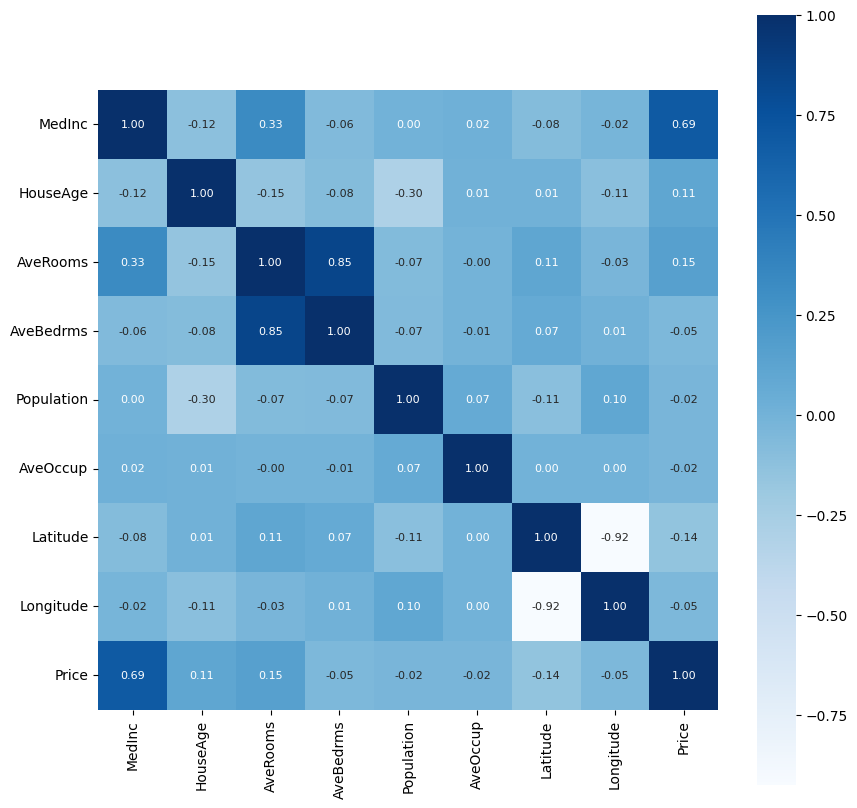

In [36]:
# CONSTRUCTING HEATMAP TO UNDERSTAND THE CORRELATION
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='Blues')
# cbar -> Color Bar (Right Side Waala)
# square -> all values in square
# fmt -> only till 1 decimal place
# annot -> annotations (labels shown in the plot)
# annot_kws -> size of annotations(font)
# cmap -> color of heatmap;

In [37]:
# SPLITTING THE DATA AND LABELS(TARGETS)
x = house_prices_dataframe.drop(columns='Price', axis=1)
y = house_prices_dataframe['Price']

In [39]:
print(x)
print(y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

In [44]:
# SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [45]:
print(x.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [46]:
# MODEL TRAINING
# XGBoost Regression ----> Uses Decision Tree

# LOADING THE MODEL
model = XGBRegressor()

In [48]:
# TRAINING THE MODEL WITH TRAINING DATA
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
# MODEL EVALUATION ON TRAINING DATA
x_train_predicted = model.predict(X_train)

In [52]:
print(x_train_predicted)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [54]:
# FOR CLASSIFICATION -----> ACCURACY SCORE
# FOR REGRESSION -----> R Squared Error for THIS model

# R SQUARE ERROR
score_1 = metrics.r2_score(Y_train, x_train_predicted) #-----> gives output based on the variance between the two values

# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_train, x_train_predicted) #-----> Mean Value

print("R Square Error: ", score_1)
print("Mean Absolute Error: ", score_2)

# LESSER THE ERROR, MORE ACCURATE THE MODEL

R Square Error:  0.943650140819218
Mean Absolute Error:  0.1933648700612105


In [56]:
# MODEL EVALUATION ON TESTING DATA
X_test_predicted = model.predict(X_test)

In [57]:
print(X_test_predicted)

[2.8649795  1.790346   0.92074925 ... 1.5385513  0.92647874 2.043316  ]


In [59]:
# ERROR CALCULATION

# R SQUARE ERROR
score_1 = metrics.r2_score(Y_test, X_test_predicted) #-----> gives output based on the variance between the two values

# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_test, X_test_predicted) #-----> Mean Value

print("R Square Error: ", score_1)
print("Mean Absolute Error: ", score_2)

R Square Error:  0.8338000331788725
Mean Absolute Error:  0.3108631800268186


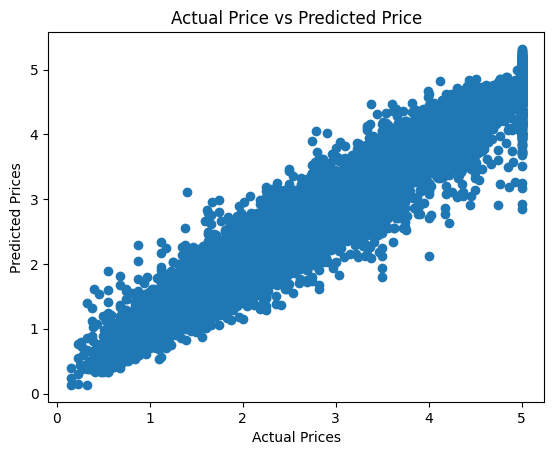

In [61]:
# VISUALISING THE ACTUAL PRICES AND PREDICTED PRICES

plt.scatter(Y_train, x_train_predicted)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()